In [105]:
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy.random import choice
import copy
from matplotlib import cm
import matplotlib
import matplotlib.image as mpimg
import matplotlib.animation as animation
from IPython.display import HTML  # for embedded matplotlib animation
from math import *

matplotlib.rc('animation', html='html5')

In [71]:
a = 1/2
li = [a]*2
print(li)

[0.5, 0.5]


{}


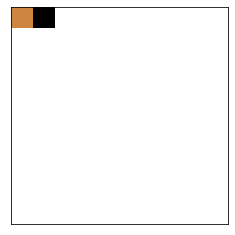

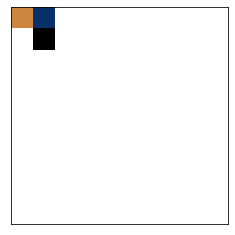

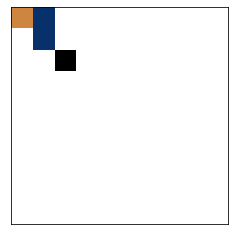

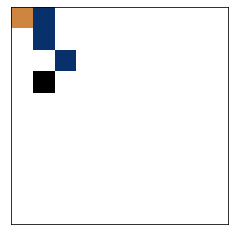

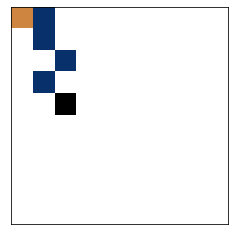

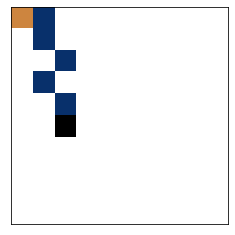

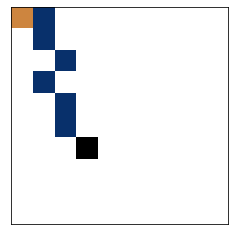

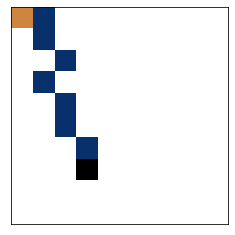

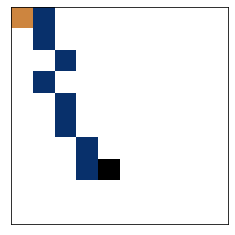

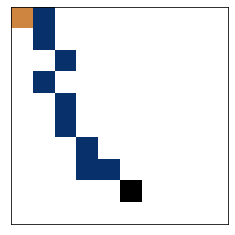

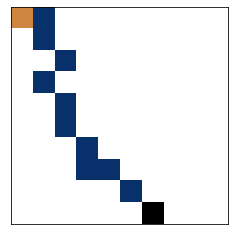

In [120]:
class Grid:
    
    # para([Grid size, pheromone strenght, pheromone fade])
    def __init__(self, para):
        # Create board of specifc board size 
        self.grid = np.zeros((para[0], para[0]), dtype=int)
        self.grid_size = para[0]
        self.nest_value = 25
        self.food_source_value = 1000
        self.ant_value = 5
        self.pheromone_strength = para[1]
        self.pheromone_fade = para[2]
        self.ant_dict = {}
        self.nest_location = None
        self.food_location = {}
        self.total_cost = 0
        self.cost_per_step = 0.1
        self.food_reward = 2*self.cost_per_step * (para[0]-1) +1
        
#     ''' 
#     This function needs the amount of worker ants and scouting ants. 
#     The coordinates of the nest and the food should also be given to 
#     this function.
#     '''
#     def init_simulation(self, **args):
#         while self.food_source_value != 0:
#             for i in self.n_scout:
#                 init_step = decide_step_search(self.nest_location, self.nest_location)
#                 ant_set_step(self.nest_location, init_step)
#                 renew_board()
#             renew_board()

    # Get neighbour xy coordinates as tuple  
    def check_neighbours(self, coord, grid_size):
        # Initalize variables
        neighbours = []

        # List of relative position for all possible neighbours of a coordinate
        adj = [(-1, 1), (0, 1), (1, 1), (-1, 0), (1, 0), (-1, -1), (0,-1), (1,-1)]

        # Create list of all possible nieghbours
        for n in adj:
            neighbours.append(tuple(np.subtract(coord, n)))

        # In case of corners and edge pieces: find all neighbours that exist but are not valid for the specific 
        # board
        neigh = []
        for n_tup in neighbours:
            if n_tup[0] < 0 or n_tup[1] < 0:
                neigh.append(n_tup)
            elif n_tup[0] > grid_size or n_tup[1] > grid_size:
                neigh.append(n_tup)

        # Remove the found none valid neighbours 
        for i in neigh:
            neighbours.remove(i)

        # Return list of neighbours as tuple
        return neighbours

    # change value at specific cell, returns new grid
    def change_cell_value(self, coord, new_value):
        self.grid[coord[1]][coord[0]] = new_value
        return self.grid

    # return which value a cell has
    def get_kind(self, coord):
        return self.grid[coord[1]][coord[0]]
    
    def setKind(self, coord, value):
        x = coord[0]
        y = coord[1]
        if value is not 5 and value is not 25 and value < 100:
            return "Invalid value"
        self.grid[y, x] = value

    def antArrives(self, coord):
        x = coord[0]
        y = coord[1]
        self.grid[y, x] += self.ant_value

    def antLeaves(self, coord):
        x = coord[0]
        y = coord[1]
        self.grid[y, x] -= self.ant_value
        self.addPheromone(coord)

    def addPheromone(self, coord):
        x = coord[0]
        y = coord[1]
        self.grid[y, x] += pheromone_strength

    def pheromoneFade(self, coord):
        # The cell must already have pheromones
        x = coord[0]
        y = coord[1]
        
        # reaction-diffusion-type simulation (Moore neighbours)
        surroundPhero = 0
        for i in self.check_neighbours(coord, self.grid_size):
            if 0 <= self.get_kind(i) <= 1:
                surroundPhero += self.get_kind(i) 
        new_value = (self.get_kind((x, y)) * (1 - 8* self.pheromone_fade) + self.pheromone_fade*surroundPhero)
        self.change_cell_value((x, y), new_value)

    def retrieveFood(self, coord):
        # The cell must be of the kind food source
        x = coord[0]
        y = coord[1]
        self.grid[y, x] -= self.food_value;
    
    def setNestLocation(self, coord):
        x = coord[0]
        y = coord[1]
        self.nest_location = (x,y)
        self.setKind(coord, self.nest_value)

    def setFoodSource(self, coord):
        x = coord[0]
        y = coord[1]
        self.setKind(coord, self.food_source_value)
        self.food_location.append(coord)

    def origin_distance(self, coord, origin):
        val = np.square(coord[0]-origin[0])+np.square(coord[1]-origin[1])
        return np.sqrt(val)
        
    def possible_steps_list(self, coord, origin):
        pn = self.check_neighbours(coord, self.grid_size)
        dist = self.origin_distance(coord, origin)
        
        best_neigh = []
        for n in pn:
            distance = self.origin_distance(n, origin)
            if distance > dist:
                best_neigh.append(n)
        return best_neigh
        
    def decide_step_worker(self, coord, origin):
        possible_steps = self.possible_steps_list(coord, origin)
        pos_step = []
        pos_step_sum = 0
        
        for p in possible_steps:
            if 0 < self.get_kind(p) <= 1:
                pos_step.append(p)
                pos_step_sum += self.get_kind(p)
                
        probability_distribution = []
        
        for pos in pos_step:
            print(self.get_kind(pos))
            probability_distribution.append(self.get_kind(pos)/pos_step_sum)
        
        if pos_step == []:
            pos_step = possible_steps
            prob_value = 1/len(possible_steps)
            probability_distribution = [prob_value]*len(possible_steps)
        
        [index] = choice(range(len(pos_step)), 1, p=probability_distribution)

        return pos_step[index]
    
    def decide_step_search(self, coord, origin):
        possible_steps = self.possible_steps_list(coord, origin)
        
        pos_step = []
        for p in possible_steps:
            if self.get_kind(p) in self.food_location.keys():
                return self.get_kind(p)
            if self.get_kind(p) == 0 or self.ant_value < self.get_kind < self.ant_value+self.pheromone_value:
                pos_step.append(self.get_kind(p))
        return random.choice(pos_step)
    
    def antSetStep(self, coord, nextCoord):
        x = coord[0]
        y = coord[1]
        x_next = nextCoord[0]
        y_next = nextCoord[1]
        self.grid[y_next, x_next] += self.ant_value
        self.grid[y, x] -= self.ant_value
        self.grid[y, x] += self.pheromone_strength
        self.total_cost += self.cost_per_step

    def routeBack(self, coord, origin):
        x = coord[0]
        y = coord[1]

        x_new = x
        y_new = y

        x_orig = origin[0]
        y_orig = origin[1]

        dx = x - x_orig
        dy = y - y_orig

        # Three possibilities: ant is on the same x or y coordinate, in which case it
        # can walk back in a straight line.
        # Or the x-distance is the same as the y-distance, in whcih case the ant can 
        # walk back in diagonal line.
        # Else, the ant should walk back in a partly diagonal, partly straight line.

        while x != x_orig and y != y_orig:
            if x == x_orig:
                x_new += dx / np.abs(dx)
                self.antSetStep((x, y), (x_new, y_new))
                x = x_new
                continue

            if np.abs(dx) == np.abs(dy):
                x_new += dx / np.abs(dx)
                y_new += dx / np.abs(dy)
                self.antSetStep((x, y), (x_new, y_new))
                x = x_new
                y = y_new
                continue

            while y != y_orig:
                x_new += dx / np.abs(dx)
                y_new += dx / np.abs(dy)
                self.antSetStep((x, y), (x_new, y_new))
                x = x_new
                y = y_new

            y_new += dy / np.abs(dy)
            self.antSetStep((x, y), (x_new, y_new))
            y = y_new
            
    def add_work_ant(self):
        self.ant_dict[self.nest_location] = self.nest_location, 'w'
    
    def add_search_ant(self):
        self.ant_dict[self.nest_location] = self.nest_location, 's'
        
    def get_ant_origin(self, coord):
        self.ant_dict[coord]
        
    def add_food_location(self, coord, amount):
        self.food_location[coord] = amount

    # update board
    def renew_board(self):
        current_board = copy.deepcopy(self)
        
        for i in range(len(self.grid)):
            for j in range(len(self.grid)):
                curr_cell = (j,i)
                cell_value = self.get_kind((j,i))
                
                # If cell is empty
                if cell_value == 0:
                    continue
                
                # If cell contains an ant
                if curr_cell in current_board.ant_dict.keys():
                    origin = current_board.ant_dict[curr_cell][0]
                    type_ant = current_board.ant_dict[curr_cell][1]
                    
                    # If cell contains a foodsource, change origin when there is also an ant and lower the 
                    # amount of food left and lower cost
                    if curr_cell in current_board.food_location.keys():
                        self.ant_dict[curr_cell] = curr_cell, type_ant
                        self.total_cost -= self.food_reward
                        self.food_location[curr_cell] =  self.food_location[curr_cell] - 1

                    # If cell contains a nest, change origin when there is also an ant
                    if curr_cell == current_board.nest_location:
                        self.ant_dict[curr_cell] = curr_cell, type_ant 
                    
                    # Check if worker ant
                    if type_ant == 'w':
                        new_cell = current_board.decide_step_worker(curr_cell, origin)
                        self.antSetStep(curr_cell, new_cell)
                        del self.ant_dict[curr_cell]
                        self.ant_dict[new_cell] = origin, type_ant
                        
                    # Check if search ant
                    if type_ant == 's':
                        new_cell = current_board.decide_step_search(curr_cell, origin)
                        self.antSetStep(curr_cell, new_cell)
                        del self.ant_dict[curr_cell]
                        self.ant_dict[new_cell] = origin, type_ant
                        
                # If cell is empty but contains a pheromone
                if 0 < cell_value <= 1:
                    current_board.pheromoneFade(curr_cell)
    
    def animation(self):
        # get grid
        showGrid()
        
        im.set_array(showGrid())
        
        grid_ani = animation.FuncAnimation(fig, im, 
                                   save_count = antGrids.shape[2], 
                                   interval=50, blit=False)
        plt.axis('off')
        plt.show()
        
        grid_ani.save('AntsColor.mp4', writer=writer)

        HTML(grid_ani.to_html5_video())
                
    def showGrid(self):
        # Amount of different colors for pheromones
        pheromone_amount = 80
        
        # Blue gradient for pheromones: the darker the blue, the more pheromones
        pher_colors = cm.Blues(np.linspace(0, 1, num=pheromone_amount)).tolist()
        pher_bounds = pher_bounds = np.linspace(0,1,num=pheromone_amount+1).tolist()
        
        # Other color: nothing, ant, nest and food source
        other_colors = ['white', 'black', 'white', 'peru', 'white', 'forestgreen']
        
        # Boundaries for the values of the other colors
        other_bounds = [1.00001, self.ant_value, 6.00001, 9.99999, self.nest_value + 0.01, 99.99999, 100.0]
        total_colors = sum([pher_colors, other_colors], [])
        total_bounds = sum([pher_bounds, other_bounds], [])
        
        # If the value is 0, the cell is white
        total_colors[0] = 'white'
        
        # Create a cmap of all the colors
        cmap = mpl.colors.ListedColormap(total_colors)
        norm = mpl.colors.BoundaryNorm(total_bounds, cmap.N)
        
        img = plt.imshow(self.grid,interpolation='nearest', cmap=cmap, norm=norm)
        plt.xticks([], [])
        plt.yticks([], [])
        plt.show()   

world = Grid([10, 1, 2])

#print(world.grid)
print(world.ant_dict)
world.setNestLocation((0,0))
world.add_food_location((2,4), 7)
world.add_work_ant()
world.renew_board()
world.nest_location
world.showGrid()
for i in range(10):
    world.renew_board()
    world.showGrid()